In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
awn = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 2/Sprint 2/all_wines_modified.csv', sep=",")

In [87]:
awn.shape

(5320, 17)

In [88]:
awn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5320 non-null   int64  
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality               5320 non-null   int64  
 13  quality_label         5320 non-null   object 
 14  alcohol_level         5320 non-null   object 
 15  ph_level             

In [89]:
awn.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5320.0,2000.183083,1438.614130,0.00000,777.7500,1572.00000,3208.25000,4897.00000
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000


In [90]:
count_high = awn['quality_label'].value_counts().get('high', 0)
print(count_high)

153


In [91]:
awn.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,alcohol_level,ph_level,wine_type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,regular,high,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,regular,regular,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,regular,regular,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,regular,regular,red
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,regular,high,red


In [92]:
# # Remove unnecessary columns
awn_2 = awn.drop(columns=["Unnamed: 0", "alcohol_level", "ph_level", "quality_label"])
inplace=True


In [93]:
awn_2.shape

(5320, 13)

In [94]:
awn_2[['wine_type']].head()

,wine_type
0,red
1,red
2,red
3,red
4,red


## Wine Type Prediction

In [95]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# oe = OrdinalEncoder(categories=[["red", "white"]], dtype=int) # this is how you can define the label order
# awn_2['wine_type'] = oe.fit_transform(awn[['wine_type']])

# awn_2[['wine_type']].head()


oe = OrdinalEncoder(categories=[["red", "white"]], dtype=int) # this is how you can define the label order
awn_2['wine_type'] = oe.fit_transform(awn_2[['wine_type']])

awn_2[['wine_type']].head()

,wine_type
0,0
1,0
2,0
3,0
4,0


In [96]:
awn_2[['wine_type']].tail()

,wine_type
5315,1
5316,1
5317,1
5318,1
5319,1


In [97]:
from sklearn.model_selection import train_test_split

X = awn_2.drop('wine_type', axis=1)
y = awn_2['wine_type']

print("original:", awn_2.shape, "\nX:", X.shape, "\ny:", y.shape)

original: (5320, 13) 
X: (5320, 12) 
y: (5320,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)
print(X_train, X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
786             6.8              0.41         0.31            8.80      0.084   
1465            7.4              0.39         0.23            7.00      0.033   
2016            6.9              0.22         0.37           15.00      0.053   
4618            7.3              0.33         0.22            1.40      0.041   
1318            7.1              0.68         0.00            2.30      0.087   
...             ...               ...          ...             ...        ...   
4895            6.4              0.18         0.28           17.05      0.047   
4671            6.8              0.30         0.26           20.30      0.037   
4486            5.9              0.18         0.29            4.60      0.032   
5192            5.1              0.25         0.36            1.30      0.035   
2993            5.7              0.45         0.42            1.10      0.051   

      free sulfur dioxide  

#### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=15000) 

In [100]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [101]:
LR_preds = LR_model.predict(X_test)
LR_preds

array([1, 1, 0, ..., 1, 0, 1])

In [102]:
y_test

4051    1
1682    1
552     0
4185    1
3793    1
       ..
3311    1
1224    0
920     0
349     0
1933    1
Name: wine_type, Length: 1064, dtype: int32

In [147]:
from sklearn.metrics import accuracy_score 

LR_acc = accuracy_score(y_test, LR_preds)
LR_acc

0.9830827067669173

#### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RF_clf = RandomForestClassifier(random_state=420)

In [106]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=420)

In [107]:
RF_preds = RF_clf.predict(X_test)
RF_preds

array([1, 1, 0, ..., 0, 0, 1])

In [148]:
RF_acc = accuracy_score(y_test, RF_preds)
RF_acc

0.9962406015037594

#### Decision Trees

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

DT_preds = tree.predict(X_test)
DT_preds

array([1, 1, 0, ..., 0, 0, 1])

In [111]:
y_test

4051    1
1682    1
552     0
4185    1
3793    1
       ..
3311    1
1224    0
920     0
349     0
1933    1
Name: wine_type, Length: 1064, dtype: int32

In [149]:
DTC_acc = accuracy_score(y_test, DT_preds)
DTC_acc

0.981203007518797

#### Support Vector Machines

In [113]:
from sklearn import svm


In [114]:
clf = svm.SVC(random_state=420)

In [115]:
clf.fit(X_train, y_train)

SVC(random_state=420)

In [116]:
SVM_preds = clf.predict(X_test)
SVM_preds

array([1, 1, 1, ..., 1, 0, 1])

In [117]:
y_test

4051    1
1682    1
552     0
4185    1
3793    1
       ..
3311    1
1224    0
920     0
349     0
1933    1
Name: wine_type, Length: 1064, dtype: int32

In [150]:
SVM_acc = accuracy_score(y_test, SVM_preds)
SVM_acc

0.9323308270676691

In [154]:
LR_acc
RF_acc
DTC_acc
SVM_acc

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc, "\nDecisionTreeClassifier: ", 
    DTC_acc, "\nSupport Vector Machines: ",SVM_acc)

Logistic Regression:  0.9830827067669173 
Random Forest:  0.9962406015037594 
DecisionTreeClassifier:  0.981203007518797 
Support Vector Machines:  0.9323308270676691


## Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, LR_preds)
cm_RF = confusion_matrix(y_test, RF_preds)
cm_DTC = confusion_matrix(y_test, DT_preds)
cm_SVM = confusion_matrix(y_test, SVM_preds)

In [142]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# unique_labels = np.unique(awn_2.wine_type) 

# # Plot the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=unique_labels)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

## Other method - Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, LR_preds)
cm_LR

array([[265,   9],
       [  9, 781]], dtype=int64)

In [ ]:
# # confirm TP/TN/FP/FN totals

# compare = pd.concat([pd.Series(LR_preds), y_test.reset_index(drop=True)], axis="columns")

# def self_cm(row):
#     pred, actual = row.items()
#     if pred[1] == 1:
#         return "TP" if pred[1] == actual[1] else "FP"
#     else:
#         return "TN" if pred[1] == actual[1] else "FN"

# CM_col = compare.apply(self_cm, axis=1)

# CM_col.value_counts()

In [132]:
cm_df = pd.DataFrame(cm_LR,
  index = ["Red","White"],
  columns = ["White","Red"]
)
cm_df

,White,Red
Red,265,9
White,9,781


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

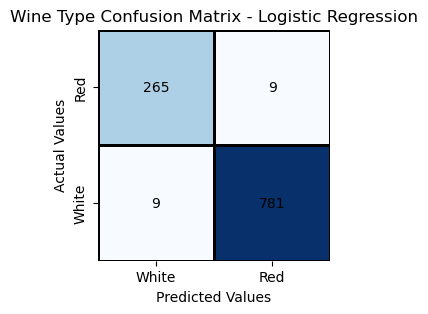

In [138]:
plt.figure(figsize=(3,3))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, cmap="Blues",fmt='d', cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Type Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

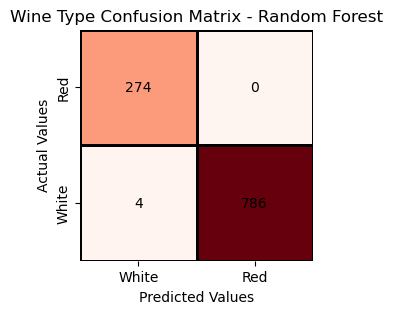

In [140]:
cm_df = pd.DataFrame(cm_RF,
  index = ["Red","White"],
  columns = ["White","Red"]
)


plt.figure(figsize=(3,3))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, cmap="Reds",fmt='d', cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Type Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

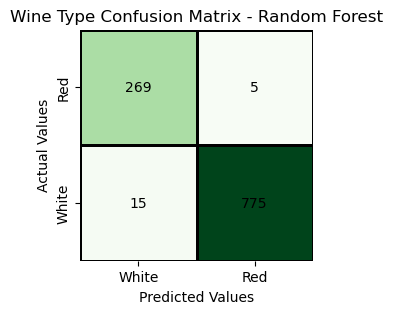

In [143]:
cm_df = pd.DataFrame(cm_DTC,
  index = ["Red","White"],
  columns = ["White","Red"]
)


plt.figure(figsize=(3,3))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, cmap="Greens",fmt='d', cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Type Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

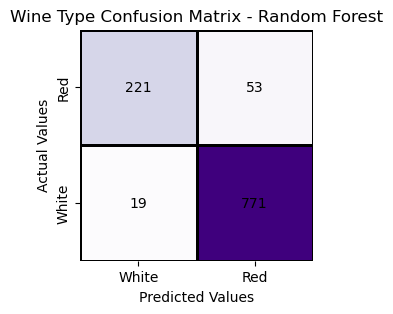

In [146]:
cm_df = pd.DataFrame(cm_SVM,
  index = ["Red","White"],
  columns = ["White","Red"]
)


plt.figure(figsize=(3,3))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, cmap="Purples",fmt='d', cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Type Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Wine Quality Prediction

In [2030]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
awn_2['quality_label'] = awn_2['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
inplace=True

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
awn_2['quality_label'] = pd.Categorical(awn_2['quality_label'],
categories=['low', 'medium', 'high'])
inplace=True

In [2031]:
awn_2 = awn.drop(columns=["Unnamed: 0", "alcohol_level", "ph_level", "quality"])
inplace=True

In [2032]:
awn_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality_label         5320 non-null   object 
 12  wine_type             5320 non-null   object 
dtypes: float64(11), object(2)
memory usage: 540.4+ KB


In [2033]:
awn_2[['wine_type', 'quality_label']].tail()

,wine_type,quality_label
5315,white,medium
5316,white,low
5317,white,medium
5318,white,medium
5319,white,medium


In [2034]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder(categories=[["low", "medium", "high"]], dtype=int) # this is how you can define the label order
awn_2['quality_label'] = oe.fit_transform(awn_2[['quality_label']])

le = LabelEncoder()
awn_2['wine_type'] = le.fit_transform(awn_2['wine_type'])

awn_2[['quality_label', 'wine_type']].head()

,quality_label,wine_type
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [1617]:
# separate remaining categorical columns
cat_cols = awn_2.select_dtypes('object')
for label, values in cat_cols.items():
    print(label, values.unique())

### Split Data

In [1618]:
from sklearn.model_selection import train_test_split

X = awn_2.drop('quality_label', axis=1)
y = awn_2['quality_label']

print("original:", awn_2.shape, "\nX:", X.shape, "\ny:", y.shape)

original: (5320, 13) 
X: (5320, 12) 
y: (5320,)


In [1619]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)
print(X_train, X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
786             6.8              0.41         0.31            8.80      0.084   
1465            7.4              0.39         0.23            7.00      0.033   
2016            6.9              0.22         0.37           15.00      0.053   
4618            7.3              0.33         0.22            1.40      0.041   
1318            7.1              0.68         0.00            2.30      0.087   
...             ...               ...          ...             ...        ...   
4895            6.4              0.18         0.28           17.05      0.047   
4671            6.8              0.30         0.26           20.30      0.037   
4486            5.9              0.18         0.29            4.60      0.032   
5192            5.1              0.25         0.36            1.30      0.035   
2993            5.7              0.45         0.42            1.10      0.051   

      free sulfur dioxide  

## ML Models

#### Logistic Regression

In [1875]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LR_model = LogisticRegression(penalty='l1', solver='saga', max_iter=15000) 

In [1876]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=15000, penalty='l1', solver='saga')

In [1877]:
preds = LR_model.predict(X_test)
preds

array([0, 0, 0, ..., 1, 1, 1])

In [1878]:
y_test

64      1
740     0
148     0
4308    1
4472    0
       ..
5240    0
372     1
1363    1
1127    1
4726    1
Name: quality_label, Length: 1064, dtype: int32

In [1879]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(y_test, preds)
acc

0.7124060150375939

In [1880]:
# # Accuracy score
# print("Accuracy:", accuracy_score(y_test, preds))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       411
           1       0.71      0.86      0.78       622
           2       0.00      0.00      0.00        31

    accuracy                           0.71      1064
   macro avg       0.48      0.47      0.47      1064
weighted avg       0.69      0.71      0.69      1064


Confusion Matrix:
[[224 187   0]
 [ 88 534   0]
 [  0  31   0]]


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### RandomForest

In [1881]:
from sklearn.ensemble import RandomForestClassifier

In [1882]:
RF_clf = RandomForestClassifier(random_state=42)

In [1883]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1884]:
preds = RF_clf.predict(X_test)
preds

array([1, 0, 0, ..., 0, 1, 1])

In [1885]:
y_test

64      1
740     0
148     0
4308    1
4472    0
       ..
5240    0
372     1
1363    1
1127    1
4726    1
Name: quality_label, Length: 1064, dtype: int32

In [1886]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(y_test, preds)
acc

0.7302631578947368

In [1887]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, preds))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))

Accuracy: 0.7302631578947368

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       411
           1       0.74      0.83      0.78       622
           2       0.00      0.00      0.00        31

    accuracy                           0.73      1064
   macro avg       0.48      0.49      0.48      1064
weighted avg       0.71      0.73      0.72      1064


Confusion Matrix:
[[261 150   0]
 [105 516   1]
 [  1  30   0]]


### Decision Trees

In [1888]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [1889]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=420)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=420)

In [1890]:
y_test

64      1
740     0
148     0
4308    1
4472    0
       ..
5240    0
372     1
1363    1
1127    1
4726    1
Name: quality_label, Length: 1064, dtype: int32

In [1891]:
y_pred = clf.predict(X_test)

In [1892]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6654135338345865

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       411
           1       0.72      0.73      0.73       622
           2       0.00      0.00      0.00        31

    accuracy                           0.67      1064
   macro avg       0.45      0.45      0.45      1064
weighted avg       0.67      0.67      0.67      1064


Confusion Matrix:
[[251 156   4]
 [135 457  30]
 [  6  25   0]]


## More balanced distribution

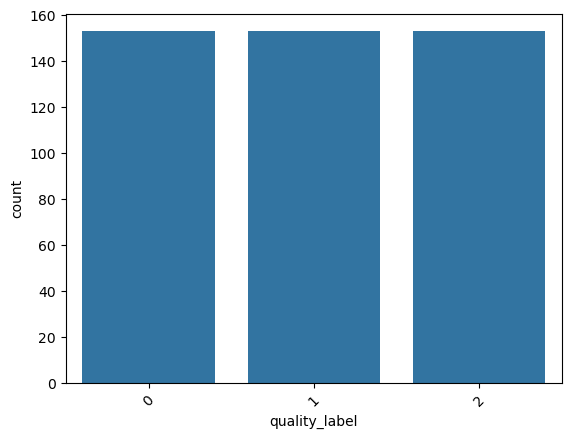

In [1893]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

X = awn_2.drop('quality_label', axis=1)
y = awn_2.quality_label

X_over, y_over = undersample.fit_resample(X, y)

sns.countplot(x=y_over, data=awn_2)
plt.xticks(rotation=45)
plt.show()

In [1894]:
awn_2.shape

(5320, 13)

In [1895]:
X_over.shape

(459, 12)

In [1896]:
# Building the model
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size=.2)

In [1897]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [1898]:
def logistic_model(C, solver_, multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver=solver_, n_jobs=1, C=C)
    return logistic_regression_model

c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ovr liblinear'),
  Text(1, 0, 'ovr newton-cg'),
  Text(2, 0, 'ovr lbfgs'),
  Text(3, 0, 'ovr sag'),
  Text(4, 0, 'ovr saga'),
  Text(5, 0, 'multinomial liblinear'),
  Text(6, 0, 'multinomial newton-cg'),
  Text(7, 0, 'multinomial lbfgs'),
  Text(8, 0, 'multinomial sag'),
  Text(9, 0, 'multinomial saga')])

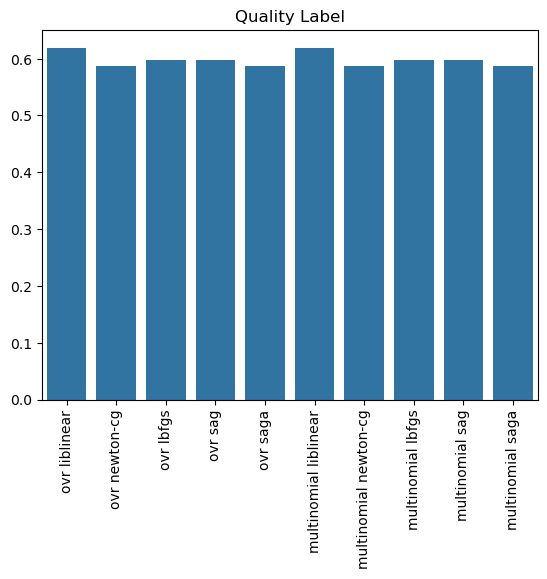

In [1899]:
multiclass = ['ovr', 'multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []

for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1, j, i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + ' ' + j)
            accuracy = accuracy_score(y_test, predictions)
            scores.append(accuracy)
        except:
            None

sns.barplot(x=params, y=scores).set_title('Quality Label')
plt.xticks(rotation=90)

[[24  5  2]
 [ 9 10 10]
 [ 3  6 23]]
0.6195652173913043


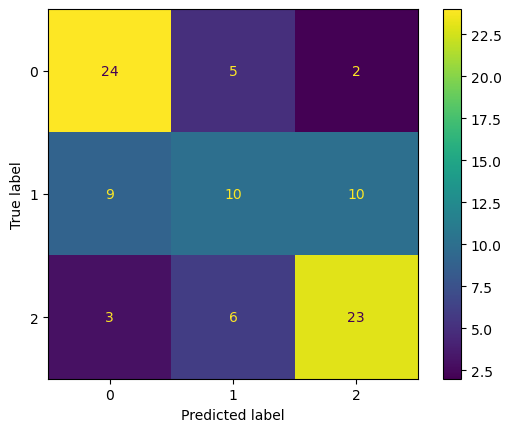

In [1900]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

model = logistic_model(1, 'liblinear', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Select Features

In [1901]:
awn_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,0


In [1902]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol']
X = awn_2[feature_cols] # Features
y = awn_2.quality_label # Target variable

In [1903]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [1904]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=15000, random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [1905]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[223, 160,   0],
       [123, 524,   0],
       [  0,  34,   0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

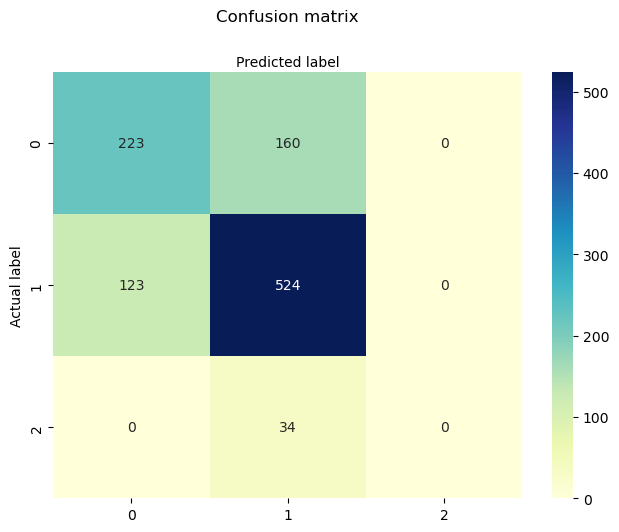

In [1906]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [1907]:
# from sklearn.metrics import classification_report
# target_names = ['low', 'mediun','high']
# print(classification_report(y_test, y_pred, target_names=target_names))

In [1908]:
acc = accuracy_score(y_test, y_pred)
acc

0.7020676691729323

In [2040]:
awn_2.to_csv("all_wines_encoded.csv")